# Plot Statics

In [29]:
import numpy as np
import numpy.random as rn
import scipy.stats as st
import scipy.fftpack as ft
import scipy.integrate as od
import scipy.signal as sig
import scipy.interpolate as intpl
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import tqdm as tqdm
import pickle
from scikits.odes.odeint import odeint

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"  #"Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
#rc('text', usetex=True)

In [30]:
import pandas as pd

In [56]:
data0 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_0_prma100.csv.csv'))
dataszA = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//sz_analytical.csv'))
datapi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi16_prma100.csv'))
datapi8 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi8_prma100.csv'))
data3pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_3pi16_prma100.csv'))
datapi4 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi4_prma100.csv'))
data5pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_5pi16_prma100.csv'))
data3pi8 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_3pi8_prma100.csv'))
data7pi16 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_7pi16_prma100.csv'))
datapi2 = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_pi2_prma100.csv'))

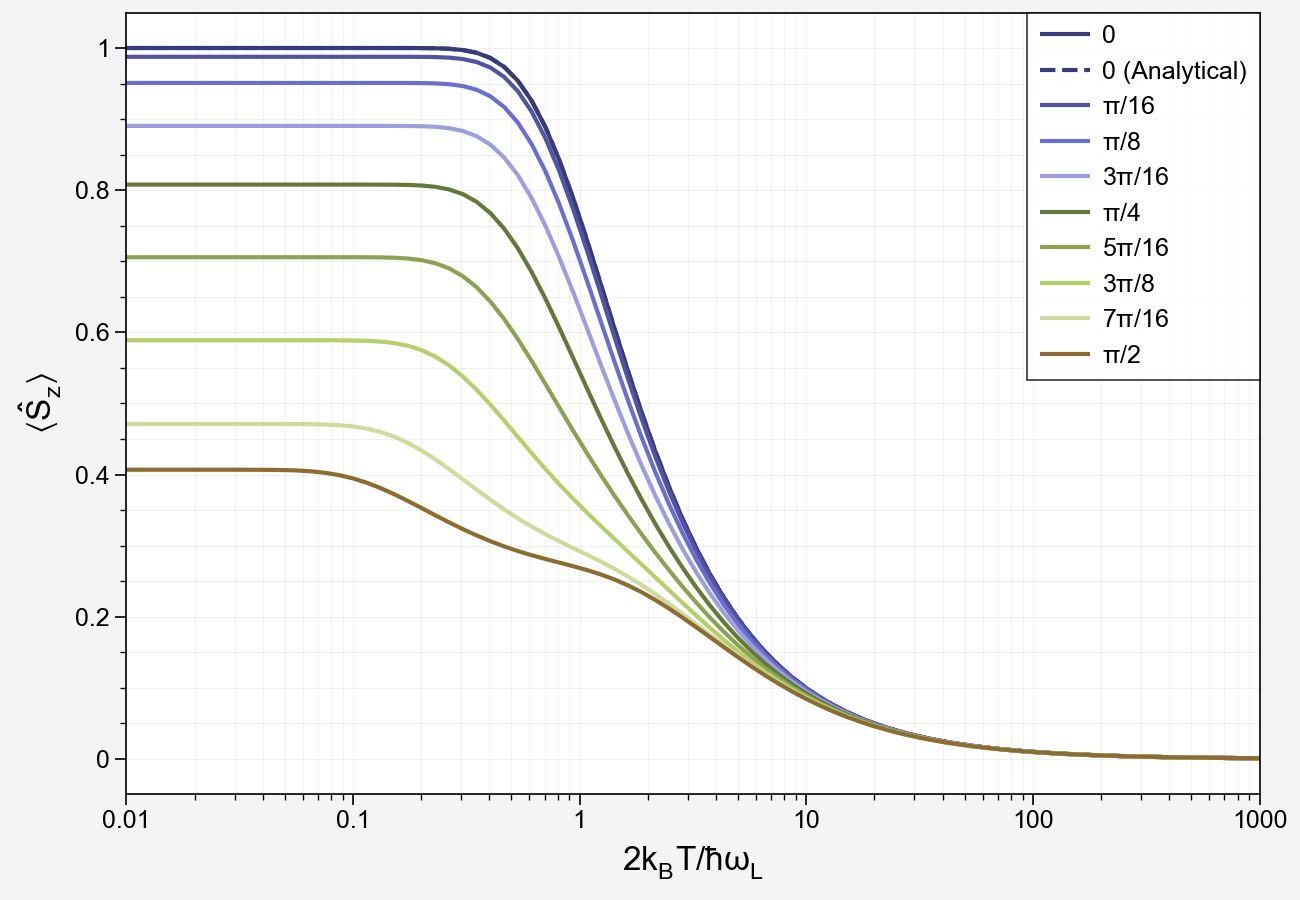

In [57]:
fig, ax = pplt.subplots(figsize=(6.5, 4.5))  #size in inches

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel("$2 k_B T/\hbar \omega_L$", fontsize=12)
ax.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax.set_xlim(0.01, 1000)
pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax.semilogx(data0[:,0], -data0[:,5], 'C0-', label = "0")
ax.semilogx(dataszA[:,0], -dataszA[:,1], 'C0--', label = "0 (Analytical)") # 1D Analytic Expression for Purely z-Coupling
ax.semilogx(datapi16[:,0], -datapi16[:,5], 'C1-', label = "$\pi/16$")
ax.semilogx(datapi8[:,0], -datapi8[:,5], 'C2-', label = "$\pi/8$")
ax.semilogx(data3pi16[:,0], -data3pi16[:,5], 'C3-', label = "$3\pi/16$")
ax.semilogx(datapi4[:,0], -datapi4[:,5], 'C4-', label = "$\pi/4$")
ax.semilogx(data5pi16[:,0], -data5pi16[:,5], 'C5-', label = "$5\pi/16$")
ax.semilogx(data3pi8[:,0], -data3pi8[:,5], 'C6-', label = "$3\pi/8$")
ax.semilogx(data7pi16[:,0], -data7pi16[:,5], 'C7-', label = "$7\pi/16$")
ax.semilogx(datapi2[:,0], -datapi2[:,5], 'C8-', label = "$\pi/2$")

##### Plot ######

plt.legend(ncol=1)
plt.grid(which='both', lw='0.2')
# plt.title('Steady-State Magnetisations at Angle $\\theta$ from z-Axis (Prm. A)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//MFGS1D_theta.pdf", dpi=300)

## Geometric Plots ##

In [23]:
dataG = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//gibbs.csv')) 

In [24]:
data1D_x = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_x_prme100.csv'))
data1D_z = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs1D_z_prme100.csv'))
data2D_xy = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs2D_xy_prme15.csv'))
data2D_xz = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs2D_xz_prme15.csv'))
data3D_xyz = np.array(pd.read_csv(r'C://Users//crh222//Data//Statics//mfgs3D_xyz_prme5.csv'))

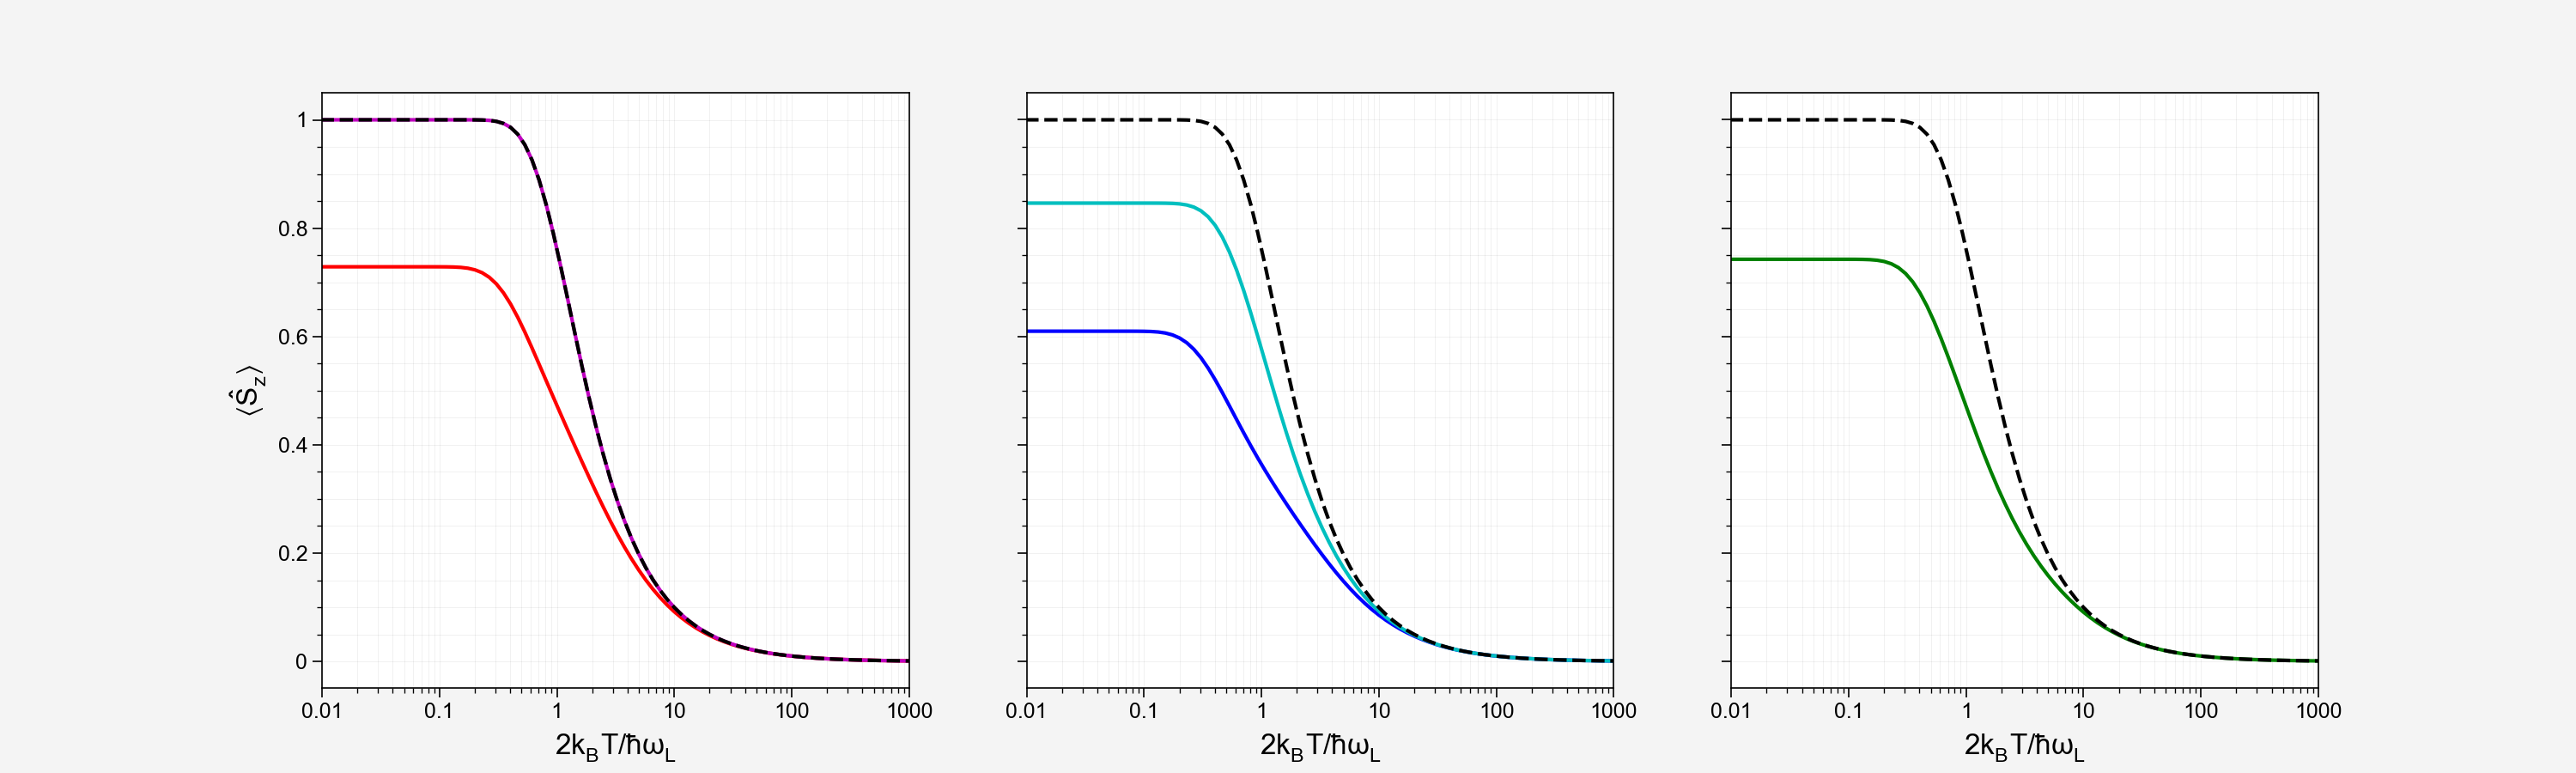

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))  #size in inches

ax[0].get_xaxis().tick_bottom()
ax[0].get_yaxis().tick_left()
ax[1].get_xaxis().tick_bottom()
ax[1].get_yaxis().tick_left()
ax[2].get_xaxis().tick_bottom()
ax[2].get_yaxis().tick_left()

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax[0].set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax[2].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)

ax[0].set_xlim(0.01, 1000)
ax[1].set_xlim(0.01, 1000)
ax[2].set_xlim(0.01, 1000)

ax[1].axes.yaxis.set_ticklabels([])
ax[2].axes.yaxis.set_ticklabels([])

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax[0].semilogx(data1D_x[:,0], -data1D_x[:,5], 'r-') # 1D MFGS X/Y
ax[0].semilogx(data1D_z[:,0], -data1D_z[:,5], 'm-') # 1D MFGS Z
ax[0].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[0].grid(which='both', lw='0.2')

ax[1].semilogx(data2D_xy[:,0], -data2D_xy[:,5], 'b-') # 2D MFGS XY
ax[1].semilogx(data2D_xz[:,0], -data2D_xz[:,5], 'c-') # 2D MFGS XZ
ax[1].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[1].grid(which='both', lw='0.2')

ax[2].semilogx(data3D_xyz[:,0], -data3D_xyz[:,5], 'g-') # 3D MFGS XYZ
ax[2].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[2].grid(which='both', lw='0.2')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//dimension_comparison_prme_raw.pdf", dpi=300)

In [ ]:
dataCl = np.array(pd.read_csv(r'/Users/charliehogg/Data/Classical/test.csv')) 

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))  #size in inches

ax[0].get_xaxis().tick_bottom()
ax[0].get_yaxis().tick_left()
ax[1].get_xaxis().tick_bottom()
ax[1].get_yaxis().tick_left()
ax[2].get_xaxis().tick_bottom()
ax[2].get_yaxis().tick_left()

ax[0].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax[0].set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)
ax[1].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)
ax[2].set_xlabel("$2k_B T/\hbar\omega_L$", fontsize=12)

ax[0].set_xlim(0.01, 1000)
ax[1].set_xlim(0.01, 1000)
ax[2].set_xlim(0.01, 1000)
fig, ax = pplt.subplots(figsize=(6.5, 4.5))  #size in inches

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel("$2 k_B T/\hbar \omega_L$", fontsize=12)
ax.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax.set_xlim(0.01, 1000)
pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax.semilogx(data0[:,0], -data0[:,5], 'C0-', label = "0")
ax.semilogx(dataszA[:,0], -dataszA[:,1], 'C0--', label = "0 (Analytical)") # 1D Analytic Expression for Purely z-Coupling
ax.semilogx(datapi16[:,0], -datapi16[:,5], 'C1-', label = "$\pi/16$")
ax.semilogx(datapi8[:,0], -datapi8[:,5], 'C2-', label = "$\pi/8$")
ax.semilogx(data3pi16[:,0], -data3pi16[:,5], 'C3-', label = "$3\pi/16$")
ax.semilogx(datapi4[:,0], -datapi4[:,5], 'C4-', label = "$\pi/4$")
ax.semilogx(data5pi16[:,0], -data5pi16[:,5], 'C5-', label = "$5\pi/16$")
ax.semilogx(data3pi8[:,0], -data3pi8[:,5], 'C6-', label = "$3\pi/8$")
ax.semilogx(data7pi16[:,0], -data7pi16[:,5], 'C7-', label = "$7\pi/16$")
ax.semilogx(datapi2[:,0], -datapi2[:,5], 'C8-', label = "$\pi/2$")

##### Plot ######

plt.legend(ncol=1)
plt.grid(which='both', lw='0.2')
# plt.title('Steady-State Magnetisations at Angle $\\theta$ from z-Axis (Prm. A)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//MFGS1D_theta.pdf", dpi=300)
ax[1].axes.yaxis.set_ticklabels([])
ax[2].axes.yaxis.set_ticklabels([])

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######

ax[0].semilogx(data1D_x[:,0], -data1D_x[:,5], 'r-') # 1D MFGS X/Y
ax[0].semilogx(data1D_z[:,0], -data1D_z[:,5], 'm-') # 1D MFGS Z
ax[0].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[0].grid(which='both', lw='0.2')

ax[1].semilogx(data2D_xy[:,0], -data2D_xy[:,5], 'b-') # 2D MFGS XY
ax[1].semilogx(data2D_xz[:,0], -data2D_xz[:,5], 'c-') # 2D MFGS XZ
ax[1].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[1].grid(which='both', lw='0.2')

ax[2].semilogx(data3D_xyz[:,0], -data3D_xyz[:,5], 'g-') # 3D MFGS XYZ
ax[2].semilogx(dataG[:,0], -dataG[:,3], 'k--') # Gibbs State
ax[2].grid(which='both', lw='0.2')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//dimension_comparison_prme_raw.pdf", dpi=300)